Datos exploratorios de kaggle
Obteniendo datos de "Mexico Minerometallurgical Stats 2001-2023" desde la pagina "https://www.kaggle.com/datasets/valamcortes/mexico-minerometallurgical-stats-2001-2023" con la siguiente descripción: "Las Estadísticas de la Industria Minerometalúrgica (EIMM) tienen como objetivo proporcionar indicadores confiables y oportunos sobre el volumen y valor de la producción minerometalúrgica. La caracterización de los datos se extiende a nivel nacional, por estado y a los municipios con actividad minera en México desde 2001 hasta 2023."


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#Lectura de datos
entrenamiento = pd.read_csv(r'C:\Users\Familia\Documents\Minerometallurgical_production_by_main_products.csv')
prueba = pd.read_csv(r'C:\Users\Familia\Documents\Minerometallurgical_production_by_main_products.csv')

In [5]:
entrenamiento.head()

,COVERAGE,YEAR,MONTH,DATE,PRODUCT_GROUP,PRODUCT,MEASUREMENT_UNIT,VOLUME,VALUE,INDEX,STATUS
0,National,2001,January,01/01/2001,Precious Metals,Gold,Kilograms,2255.1,187081.313,53.728,Final Figures.
1,National,2001,January,01/01/2001,Precious Metals,Silver,Kilograms,215465.0,312983.364,96.910,Final Figures.
2,National,2001,January,01/01/2001,Non-Ferrous Industrial Metals,Lead,Tons,11591.0,53528.285,138.091,Final Figures.
3,National,2001,January,01/01/2001,Non-Ferrous Industrial Metals,Copper,Tons,31801.0,595985.648,142.064,Final Figures.
4,National,2001,January,01/01/2001,Non-Ferrous Industrial Metals,Zinc,Tons,33286.0,363521.974,100.535,Final Figures.


In [6]:
entrenamiento.columns

Index(['COVERAGE', 'YEAR', 'MONTH', 'DATE', 'PRODUCT_GROUP', 'PRODUCT',
       'MEASUREMENT_UNIT', 'VOLUME', 'VALUE', 'INDEX', 'STATUS'],
      dtype='object')

In [7]:
entrenamiento.shape

(8724, 11)

In [8]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COVERAGE          8724 non-null   object 
 1   YEAR              8724 non-null   int64  
 2   MONTH             8724 non-null   object 
 3   DATE              8724 non-null   object 
 4   PRODUCT_GROUP     8724 non-null   object 
 5   PRODUCT           8724 non-null   object 
 6   MEASUREMENT_UNIT  8724 non-null   object 
 7   VOLUME            8724 non-null   float64
 8   VALUE             8724 non-null   float64
 9   INDEX             8724 non-null   float64
 10  STATUS            8724 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 749.8+ KB


In [9]:
entrenamiento.describe()

,YEAR,VOLUME,VALUE,INDEX
count,8724.000000,8.724000e+03,8.724000e+03,8724.00000
mean,2012.086657,1.248760e+05,4.456475e+05,107.10344
std,6.622166,2.266150e+05,1.202332e+06,85.41538
min,2001.000000,0.000000e+00,0.000000e+00,0.00000
25%,2006.000000,1.389650e+03,6.622102e+03,66.84950
50%,2012.000000,1.750300e+04,4.734077e+04,96.00000
75%,2018.000000,1.028888e+05,2.578176e+05,124.41725
max,2023.000000,1.530199e+06,1.135206e+07,775.14800


In [10]:
entrenamiento.groupby(['PRODUCT_GROUP']).count()['PRODUCT']

PRODUCT_GROUP
Non-Ferrous Industrial Metals    2652
Non-Metallic Minerals            4416
Precious Metals                   552
Steel Metals and Minerals        1104
Name: PRODUCT, dtype: int64

In [ ]:
entrenamiento.groupby(['PRODUCT_GROUP','PRODUCT']).count()['VALUE']

In [ ]:
grupo_metales=entrenamiento.groupby(['PRODUCT_GROUP','PRODUCT']).max()['VALUE']
top_10_metales = grupo_metales.nlargest(10)
print(top_10_metales)
(top_10_metales.unstack(level=0).plot(kind='bar'))
plt.show()


PRODUCT_GROUP                  PRODUCT        
Non-Ferrous Industrial Metals  Copper             1.135206e+07
Precious Metals                Gold               9.672531e+06
                               Silver             7.484334e+06
Non-Ferrous Industrial Metals  Zinc               2.500584e+06
Steel Metals and Minerals      Iron Pellets       1.639822e+06
Non-Ferrous Industrial Metals  Molybdenum         1.065235e+06
Steel Metals and Minerals      Coke               9.845091e+05
Non-Ferrous Industrial Metals  Lead               8.836940e+05
Steel Metals and Minerals      Non-Coking Coal    7.203828e+05
Non-Metallic Minerals          Fluorite           5.298128e+05
Name: VALUE, dtype: float64


AttributeError: module 'matplotlib' has no attribute 'title'

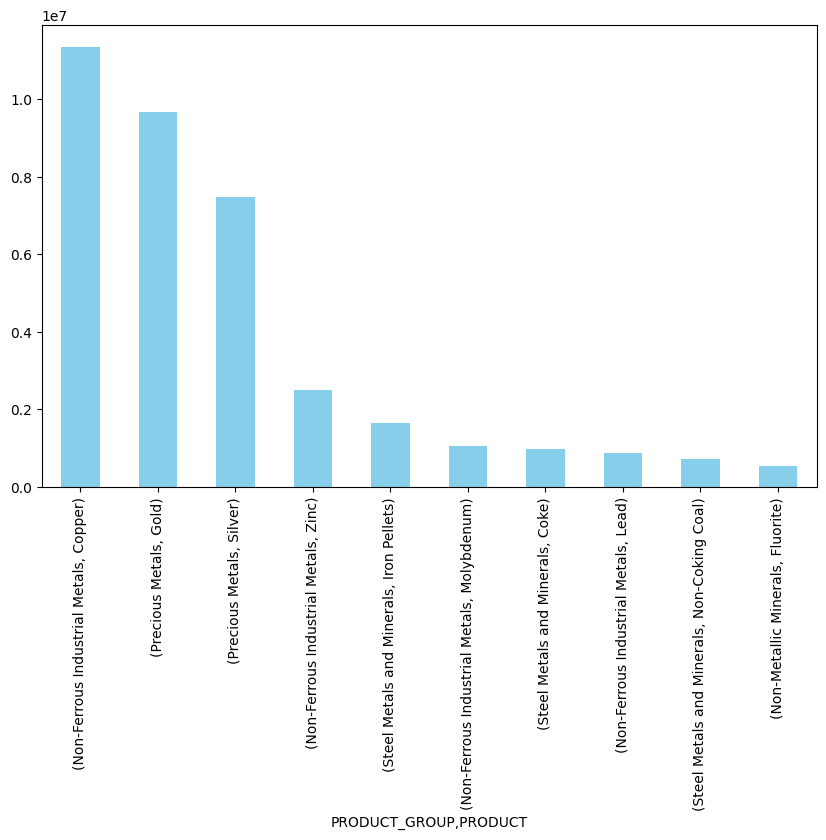

In [32]:
# Agrupa los datos y calcula el máximo valor
grupo_metales = entrenamiento.groupby(['PRODUCT_GROUP', 'PRODUCT']).max()['VALUE']

# Obtén el top 10 de valores más altos y ordénalos de mayor a menor
top_10_metales = grupo_metales.nlargest(10).sort_values(ascending=False)

# Muestra el resultado
print(top_10_metales)

# Gráfica del top 10
top_10_metales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 productos más valiosos (ordenados de mayor a menor)')
plt.ylabel('Valor')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Procesamiento de datos
con los datos:
DATE,
PRODUCT,
VALUE,
VOLUME
Para visualizar el cambio del precio con respecto a la fecha y lograr predecir precios futuros, primero creamos los campos VOLUME_KG para convertir todo a kg y despues el campo VALUE_PER_KG 

In [27]:
# Cargar los datos desde tu archivo (puedes cambiar el nombre del archivo por el tuyo)
# Asegúrate de que el archivo esté en formato CSV o Excel

# Convertir todas las unidades de VOLUME a kilogramos
entrenamiento["VOLUME_KG"] = entrenamiento.apply(
    lambda row: row["VOLUME"] * 1000 if row["MEASUREMENT_UNIT"] == "Tons" else row["VOLUME"], axis=1
)

# Crear una columna con el valor real por kilogramo
entrenamiento["VALUE_PER_KG"] = entrenamiento["VALUE"] / entrenamiento["VOLUME_KG"]


# Verifica las primeras filas del DataFrame para confirmar
print(entrenamiento.head())

   COVERAGE  YEAR    MONTH        DATE                  PRODUCT_GROUP PRODUCT  \
0  National  2001  January  01/01/2001                Precious Metals    Gold   
1  National  2001  January  01/01/2001                Precious Metals  Silver   
2  National  2001  January  01/01/2001  Non-Ferrous Industrial Metals    Lead   
3  National  2001  January  01/01/2001  Non-Ferrous Industrial Metals  Copper   
4  National  2001  January  01/01/2001  Non-Ferrous Industrial Metals    Zinc   

  MEASUREMENT_UNIT    VOLUME       VALUE    INDEX          STATUS   VOLUME_KG  \
0        Kilograms    2255.1  187081.313   53.728  Final Figures.      2255.1   
1        Kilograms  215465.0  312983.364   96.910  Final Figures.    215465.0   
2             Tons   11591.0   53528.285  138.091  Final Figures.  11591000.0   
3             Tons   31801.0  595985.648  142.064  Final Figures.  31801000.0   
4             Tons   33286.0  363521.974  100.535  Final Figures.  33286000.0   

   VALUE_PER_KG  
0     82

In [29]:
entrenamiento[['DATE','PRODUCT','VALUE_PER_KG']].head(3)

,DATE,PRODUCT,VALUE_PER_KG
0,01/01/2001,Gold,82.959209
1,01/01/2001,Silver,1.452595
2,01/01/2001,Lead,0.004618


In [30]:
entrenamiento[['DATE','PRODUCT','VALUE_PER_KG']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          8724 non-null   object 
 1   PRODUCT       8724 non-null   object 
 2   VALUE_PER_KG  8057 non-null   float64
dtypes: float64(1), object(2)
memory usage: 204.6+ KB


In [37]:
entrenamiento['VALUE_PER_KG'] = entrenamiento['VALUE_PER_KG'].fillna(entrenamiento['VALUE_PER_KG'].mean())
entrenamiento['DATE'] = pd.to_datetime(entrenamiento['DATE'], format='%d/%m/%Y')


entrenamiento[['DATE','PRODUCT','VALUE_PER_KG']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          8724 non-null   datetime64[ns]
 1   PRODUCT       8724 non-null   object        
 2   VALUE_PER_KG  8724 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 204.6+ KB


In [42]:
# Diccionario para asignar valores binarios
group_mapping = {
    'Precious Metals': 1,
    'Non-Ferrous Industrial Metals': 2,
    'Steel Metals and Minerals': 3,
    'Non-Metallic Minerals': 4
}

# Asignar los valores binarios en una nueva columna
entrenamiento['PRODUCT_GROUP_BINARY'] = entrenamiento['PRODUCT_GROUP'].map(group_mapping)

# Verificar el resultado
print(entrenamiento[['PRODUCT_GROUP', 'PRODUCT_GROUP_BINARY']].head())


                   PRODUCT_GROUP  PRODUCT_GROUP_BINARY
0                Precious Metals                     1
1                Precious Metals                     1
2  Non-Ferrous Industrial Metals                     2
3  Non-Ferrous Industrial Metals                     2
4  Non-Ferrous Industrial Metals                     2


In [43]:
# Crear un mapeo numérico basado en el orden alfabético
product_mapping = {product: i+1 for i, product in enumerate(sorted(entrenamiento['PRODUCT'].unique()))}
entrenamiento['PRODUCT_NUMERIC'] = entrenamiento['PRODUCT'].map(product_mapping)
print(entrenamiento[['PRODUCT', 'PRODUCT_NUMERIC']].head())
print(product_mapping)


  PRODUCT  PRODUCT_NUMERIC
0    Gold               13
1  Silver               27
2    Lead               18
3  Copper                8
4    Zinc               32
{'Antimony': 1, 'Arsenic': 2, 'Barite': 3, 'Bismuth': 4, 'Cadmium': 5, 'Celestite': 6, 'Coke': 7, 'Copper': 8, 'Diatomite': 9, 'Dolomite': 10, 'Feldspar': 11, 'Fluorite': 12, 'Gold': 13, 'Graphite': 14, 'Gypsum': 15, 'Iron Pellets': 16, 'Kaolin': 17, 'Lead': 18, 'Magnesium Sulfate': 19, 'Manganese': 20, 'Molybdenum': 21, 'Non-Coking Coal': 22, 'Phosphate Rock': 23, 'Salt': 24, 'Selenium': 25, 'Silica Sand': 26, 'Silver': 27, 'Sodium Sulfate': 28, 'Sulfur': 29, 'Tin': 30, 'Wollastonite': 31, 'Zinc': 32}


Vamos a escoger dos modelos de prueba.

regresión logistica y 
arboles de decisión

In [53]:
# Variable dependiente
Y_train = entrenamiento['VALUE']  

# Preprocesamiento de variables independientes
features = ['PRODUCT_GROUP_BINARY', 'PRODUCT_NUMERIC', 'VOLUME_KG']  
X_train = entrenamiento[features]

print(Y_train.shape, X_train.shape)


(8051,) (8051, 3)


In [47]:
import numpy as np

# Filtrar valores finitos en VALUE_PER_KG
entrenamiento = entrenamiento[np.isfinite(entrenamiento['VALUE_PER_KG'])]

# Verificar después de limpiar
print(entrenamiento['VALUE_PER_KG'].describe())
print(entrenamiento.shape)  # Revisar el tamaño del conjunto de datos limpio


count    8051.000000
mean       19.947155
std       123.964012
min         0.000000
25%         0.000626
50%         0.002395
75%         0.027209
max      1407.794149
Name: VALUE_PER_KG, dtype: float64
(8051, 15)


In [52]:
print(Y_train.describe())
print(Y_train.isnull().sum())  # Revisa si hay valores NaN
entrenamiento['VALUE'] = entrenamiento['VALUE'].round(2)

# Verifica que los valores han sido redondeados
print(entrenamiento['VALUE'])


count    8724.000000
mean             inf
std              NaN
min         0.000000
25%         0.000730
50%         0.002700
75%         0.061236
max              inf
Name: VALUE_PER_KG, dtype: float64
0
0       187081.31
1       312983.36
2        53528.28
3       595985.65
4       363521.97
          ...    
8719     39545.97
8720    269785.88
8721     51002.32
8722    249250.96
8723     22600.81
Name: VALUE, Length: 8051, dtype: float64


In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Mean Squared Error (MSE): 1126707192598.68
R²:  0.27


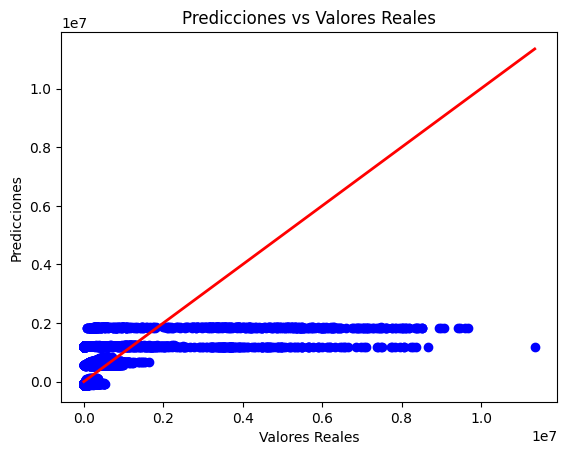

In [57]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ajusta el código para un modelo de regresión
def regression_metrics(modelo, X_train, Y_train):
    # Realizar predicciones
    y_pred = modelo.predict(X_train)
    
    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(Y_train, y_pred)
    
    # Calcular el R² (coeficiente de determinación)
    r2 = r2_score(Y_train, y_pred)
    
    # Imprimir las métricas
    print("Mean Squared Error (MSE):", np.round(mse, 2))
    print("R²: ", np.round(r2, 2))

    # Graficar las predicciones vs los valores reales
    plt.scatter(Y_train, y_pred, color='blue')
    plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linewidth=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Predicciones vs Valores Reales')
    plt.show()

# Ejemplo de uso con un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, Y_train)  # Ajustar el modelo de regresión

# Llamar a la función para evaluar el modelo
regression_metrics(modelo, X_train, Y_train)
